In [1]:
# Step 1: Loading the input data from the MNIST database
#Goal: Access the dataset of MNIST containing a training set of 60'000 examples, and a test set of 10,000 examples.

# Tensorflow allow us to import and download the MNIST dataset directly from their API
import tensorflow as tf

# The dataset is organized as a tuple of numpy arrays and split in training and test data for both the image data (X) and the labels (y)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# The dataset is limited to a training sample of 2'000 and a testing sample of 500 to shorten the running time of data
x_train=x_train[:2000]
y_train=y_train[:2000]
x_test=x_test[:500]
y_test=y_test[:500]

# Print the `digits` data
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [2]:
# Step 2: Exploring the characteristics of the input data
# Goal: Gathering some insights into the data by performing an exploratory data analysis (EDA)

import numpy as np

# Inspect the shape of training set images (x_train)
# shape = number of dimensions and items that are contained within an array
print(x_train.shape) #2'000 samples of 2 dimensional 28*28 pixel images of digits 0-9

# Inspect the shape of testing set images (x_test)
print(x_test.shape) # 500 samples of 2 dimensional 28*28 pixel images of digits 0-9

# Inspect the shape of training set labels (y_train)
print(y_train.shape) #corresponding labels

# Print the number of labels (=10, from 0 to 9)
print(len(np.unique(y_train)))

# Transform the 2 dimensional planer image into 1 dimensional array for latter analysis
# By reshaping the image array, we can visually control that the images and the data are related
# 784 columns, one for each pixel (28*28)
x_train_data=x_train.reshape((2000,784))
x_test_data=x_test.reshape((500,784)) 

# Inspect the shape of the transformed training set arrays (x_train_data, x_test_data)
print(x_train_data.shape) #2'000 samples of 1 dimensional 784 (28*28) pixel array of digits 0-9
print(x_test_data.shape) #500 samples of 1 dimensional 784 (28*28) pixel array of digits 0-9

(2000, 28, 28)
(500, 28, 28)
(2000,)
10
(2000, 784)
(500, 784)


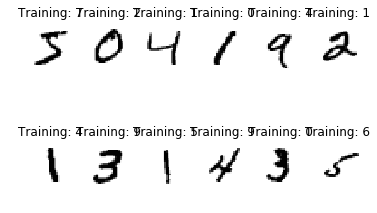

In [3]:
# Step 3: Visualizing target images with the matplotlib library
# Goal: Show the handwritten digits together with their correspnding labels 
# Remark: Since the dataset for training and testing are already splitted, 
# the subsequent plotting will only focus on the training set, as it contains more samples (2'000 vs 500)

# Import matplotlib
import matplotlib.pyplot as plt 
# To show plots within a Jupyter Notebook
%matplotlib inline

# Join the images and target labels in a list
images_and_labels = list(zip(x_train, y_test))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:12]):
    # initialize a subplot of 2X6 at the i+1-th position
    plt.subplot(2, 6, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [4]:
# Step 4: Principal Component Analysis (PCA) = Dimensionality reduction technique
# Goal: Reducing the dimensionality to grasp and visualize the data more easily 
# Remark: PCA is a linear transformation method that yields the directions (principal components), that maximize the variance of the data.

from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2,svd_solver='randomized')

# Fit and transform the data to the model
# The number of samples are limited to 1000 in order to make the dots on PCA Scatter Plot more distinguishable
reduced_data_rpca = randomized_pca.fit_transform(x_train_data[:1000])

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(x_train_data[:1000])

# Inspect the shape
print(reduced_data_pca.shape) #784 columns are reduced into only 2 columns

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

(1000, 2)
[[ 203.11671532  337.56481259]
 [1105.17423813  425.69172724]
 [  10.38508458 -417.42294633]
 ...
 [ 767.80163016  193.62864653]
 [ 148.16507464  621.08739339]
 [-203.14691051  166.32498961]]
[[ 203.11847107  337.52286767]
 [1105.17579998  425.67024741]
 [  10.3874204  -417.43463792]
 ...
 [ 767.80103611  193.62332602]
 [ 148.16661683  621.10180746]
 [-203.14950213  166.34869772]]


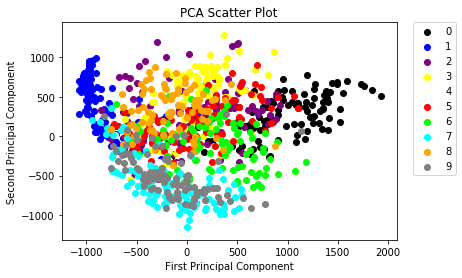

In [5]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][y_train[:1000] == i]
    y = reduced_data_rpca[:, 1][y_train[:1000] == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(list(set(y_train)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

# A fair amount of overlaps can be obeserved on the resulting scatter plot.
# This suggests that certain digits are similar and that the clustering methodology might not be suited to classify the digits

In [6]:
# Step 5: Normalization
# Goal: Pre-processing the data before being able to model it 
# Remark: Normalization means scaling the data by shifting the distribution of each attribute 
# to have a mean of zero and a standard deviation of one (unit variance).

# Import
from sklearn.preprocessing import scale

# Apply `scale()` to the `digits` data
x_train_norm = scale(x_train_data) 
x_test_norm = scale(x_test_data) 

In [7]:
# Step 6: Inspect training data
# Goal: Get a quick overview of the number of samples and features

# Number of training features
n_samples, n_features = x_train_norm.shape

# Print out `n_samples`
print(n_samples) # number of training samples

# Print out `n_features`
print(n_features) # number of features / columns in the training samples (the same as in testing samples)

# Number of Training labels
print(len(np.unique(y_train))) 

# Inspect `y_train`
print(len(y_train)) # number of labels of training samples (=number of training samples)

2000
784
10
2000


In [8]:
# Step 7: Clustering model with the k-means algorithm 
# Goal: Find the clusters (ideally 10) in the training set
# Remark: The k-means is an unsupervised learning algorithm that finds the clusters 
# and data set labels for a particular pre-chosen K. 

# Import the `cluster` module
from sklearn import cluster

# Create the k-means model (goal: get 10 centers, ideally one for each digit)
# 3 arguments: 'n_clusters'= nbr clusters we want to predefine
# init = indicates the method for initialization 
# the random_state = guarantees that we get reproducible results
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(x_train_norm)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

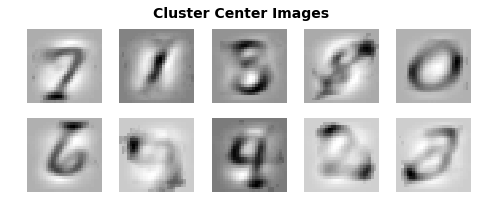

In [9]:
# Step 8: Visualizing cluster centers
# Goal: Verify visually if the clustering process has been successful

# Import matplotlib
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

# 1st and 8th images are not distinguishable; 3rd is much similar to 10th, resembling a '0'; 6th looks like a '7',
# However, is also possible that it could be a '9'

In [10]:
# Step 9: Predicting the labels
# Goal: Verify if the model predict the right values

# Predict the labels for `x_test_norm`
y_pred=clf.predict(x_test_norm)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape # 10 centers respective for 10 clusters, with 784 columns

# By comparing the predicitions with the true values, we can conclude that the classification performance is rather weak

[0 8 1 4 7 1 7 6 3 0 4 4 7 4 1 2 7 0 8 7 0 5 7 3 7 4 7 7 2 1 2 1 2 4 0 9 6
 1 1 1 1 0 7 1 1 2 1 5 7 7 5 2 3 2 8 2 7 1 7 3 6 3 7 3 0 1 7 7 2 4 0 4 9 3
 1 0 2 0 0 0 7 5 8 7 7 7 0 2 5 1 2 5 3 2 1 7 1 1 5 7]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


(10, 784)

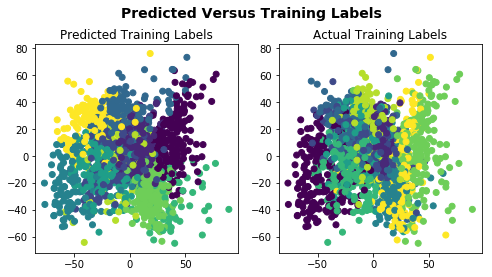

In [11]:
# Step 10: Visualizing predictions with Isomap
# Goal: Use the Isomap to visually verify the performance of the model
# Remark: Isomap() allows to reduce the dimensions of high-dimensional data set digits like the PCA method.
# The difference between both methods is that Ismomap uses a non-linear reduction method.

# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(x_train_norm)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(x_train_norm)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

# It can be observed that the distribution of the colors is not really similar, indicating bad classification

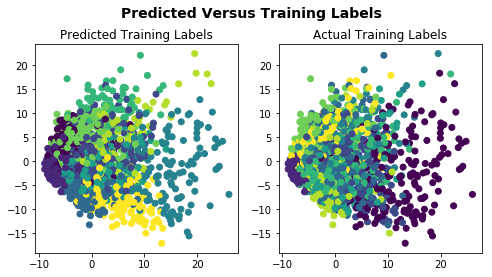

In [12]:
# Step 11: Visualizing predictions with PCA
# Goal: Compare the results with those obtained using the Isomap

# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(x_train_norm)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(x_train_norm)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

# Again, the coloring does not really match, indicating a poor model performance

In [13]:
# Step 12: Confusion matrix
# Goal: Analyze the degree of correctness of the model’s predictions
# Remark: The consfusion matrix is a summary of prediction results on a classification problem.
# Its sums up the number of correct and incorrect predictions by counting values broken down by classes.

# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

# The high number of values that are not in the diagonal, shows a low degree of correctness of the model

[[ 0  1 13  2 22  2  0  0  1  1]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 2 16  3  2  1  5  1  0 13 12]
 [ 1  7 28  1  0  1  1  1  4  1]
 [ 1  4  0  5  1  1  5 38  0  0]
 [ 2  1 26 17  1  1  0  0  0  2]
 [ 0  1  0  2  4 28  0  5  3  0]
 [21  7  0  2  0  0  7 12  0  0]
 [ 2  1 18 12  0  1  0  4  1  1]
 [ 6  2  2  3  0  0  5 36  0  0]]


In [14]:
# Step 13: Measuring the goodness of fit of the cluster labels to the correct labels
# Goal: Learn more about the quality of the clusters by applying different cluster quality metrics.

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(x_test_norm, y_pred, metric='euclidean')))

# The poor classification performance of the k-means algorithm is ultimately reflected in the low quality metrics figures
# For example, the low homogeneity score indicates that the clusters do not only contain data points which are members of a single class.
# Or the silhouette score (-1 to 1) of nearly zero which indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
# Thus, this measures show that the samples could have been assigned to the wrong cluster.

inertia    homo   compl  v-meas     ARI AMI  silhouette
1047815   0.420   0.458   0.438   0.319   0.397    0.028


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
